This notebook is thought as an introduction to Web Scraping, i.e. the art of extracting data from web pages. 

The main libraries that we will use for web scraping are:

- **Selenium**: is a web testing library. It is used to automate browser activities.
- **BeautifulSoup**: is a Python package for parsing HTML and XML documents. It creates parse trees that is helpful to extract the data easily.
- **Pandas**: Pandas is a library used for data manipulation and analysis. It is used to extract the data and store it in the desired format. 


A web scraping pipeline is divided in 6 steps:

1. **Find the URL that you want to scrape**:
2. **Inspecting the Page**:
3. **Find the data you want to extract**:
4. **Write the code**:
5. **Run the code and extract the data**:
6. **Store the data in a required format**:

### 1. Find the URL that you want to scrape
For this example, we are going scrape Flipkart website to extract the Price, Name, and Rating of Laptops. \
The URL for this page is https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off. \
It contains a lot of laptops you can buy from this website.

### 2. Inspecting the Page
The data is usually nested in tags. So, we inspect the page to see, under which tag the data we want to scrape is nested. To inspect the page, just right click on the element and click on “Inspect”. \ When you click on the “Inspect” tab, you will see a “Browser Inspector Box” open.

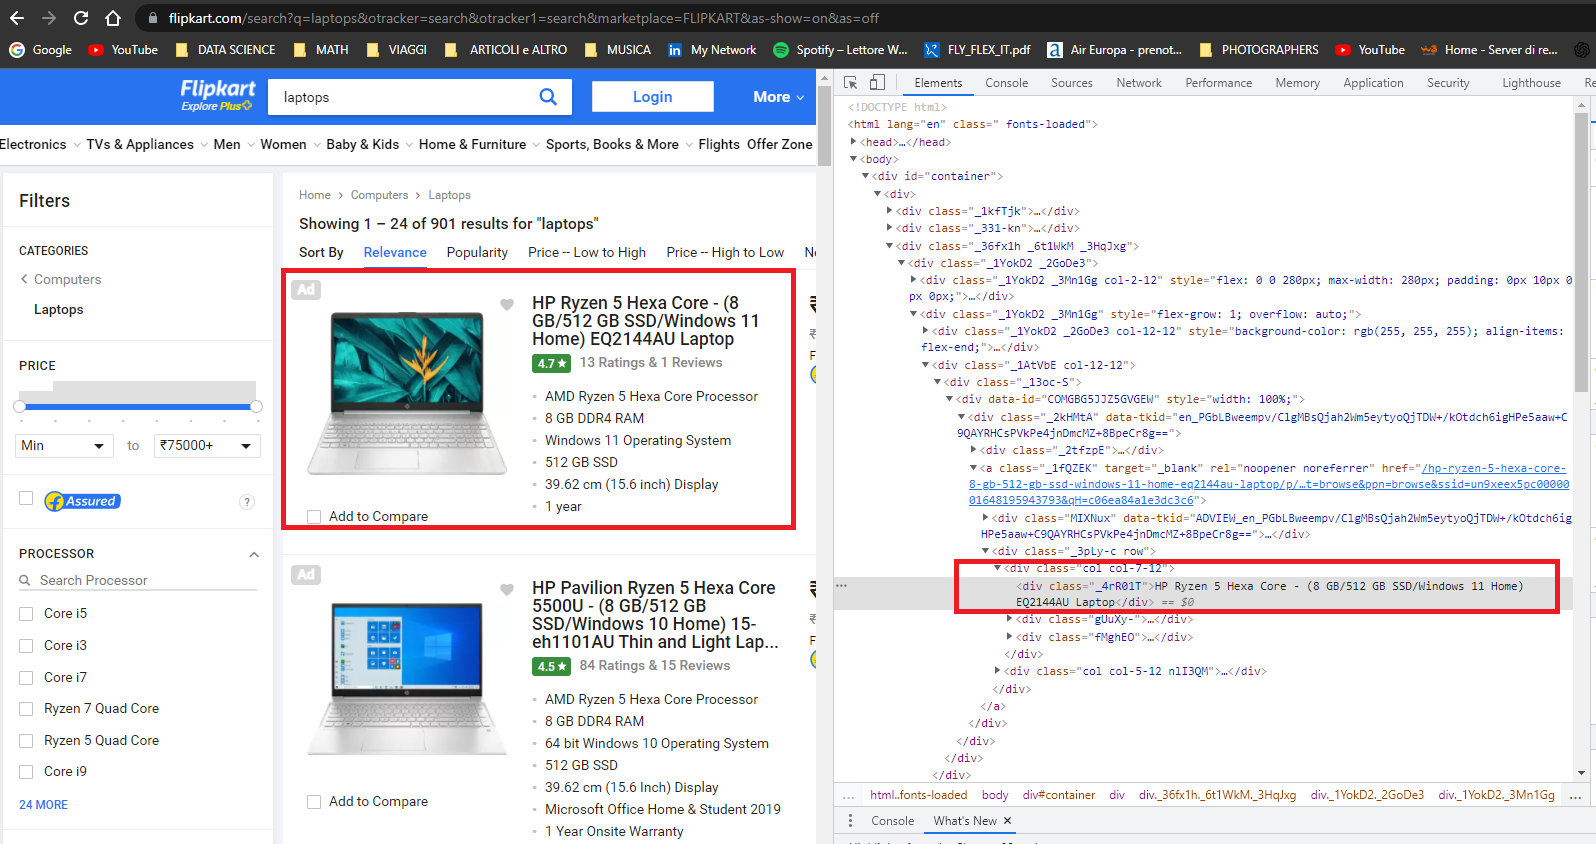

In [2]:
from IPython.display import Image
Image(filename='inspect_website.png') 

### 3. Find the data you want to extract
Let’s extract the Price, Name, and Rating which is in the “div” tag respectively.

### 4. Write the code
First of all, import the libraries.

In [15]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

To configure webdriver to use Chrome browser, we have to set the path to chromedriver.
To do that, it is important first of all to download the Chrome Driver. Indeed, a webdriver is a vital ingredient to this process. It is what will actually be automatically opening up your browser to access your website of choice. This step is different based on which browser you use to explore the internet. I happen to use Google Chrome. Some say Chrome works best with Selenium, although it does also support Internet Explorer, Firefox, Safari, and Opera. For chrome you first need to download the webdriver at https://chromedriver.chromium.org/downloads. There are several different download options based on your version of Chrome. To locate what version of Chrome you have, click on the 3 vertical dots at the top right corner of your browser window, scroll down to help, and select “About Google Chrome”. 

In [32]:
driver = webdriver.Chrome(r"C:\Users\giulio.olivero\OneDrive - ALTEN Group\NLP - Notes\chromedriver_win32\chromedriver")

Now, we will open the URL with the following code:

In [33]:
driver.get("https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off")

Now that we have written the code to open the URL, it’s time to extract the data from the website. \
As mentioned earlier, the data we want to extract is nested in **< div** **>** tags. So, I will find the div tags with those respective class-names, extract the data and store the data in a variable. \
Just for this example,we are going to extract the *name* of the products and their *prices*. \
Refer the code below:

In [34]:
products=[] #List to store name of the product
prices=[] #List to store price of the product
ratings=[] #List to store rating of the product

content = driver.page_source
soup = BeautifulSoup(content)
for a in soup.findAll('a',href=True, attrs={'class':'_1fQZEK'}):
    # find values in html code
    name=a.find('div', attrs={'class':'_4rR01T'})
    price = a.find('div',attrs={'class':'_30jeq3 _1_WHN1'})
    # append values to lists
    products.append(name.text)
    prices.append(price.text)


To understand how we have chosen the *class* parameters, take a look at the html code below.

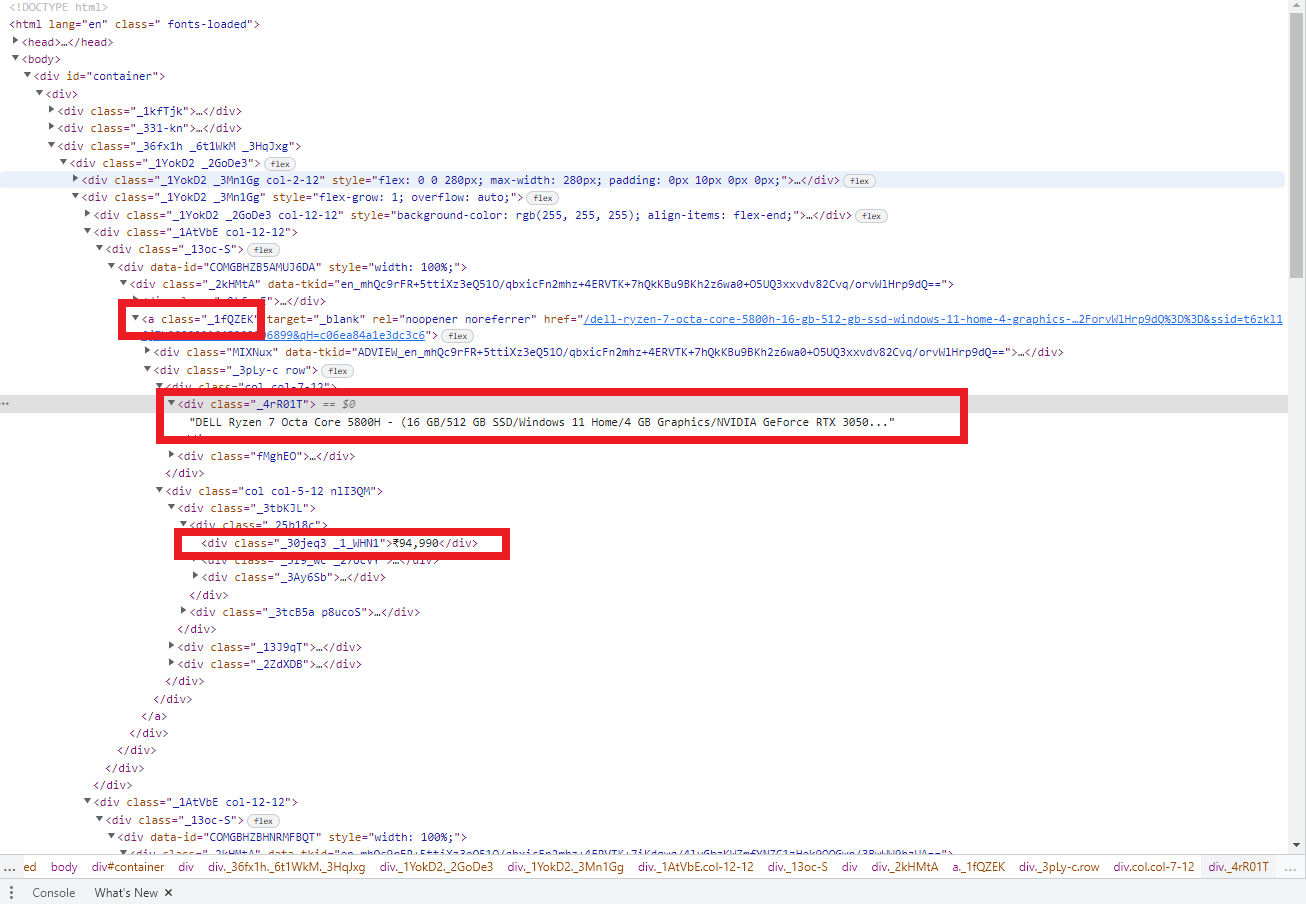

In [35]:
from IPython.display import Image
Image(filename='details_html.png') 

Finally, we organize the extracted data into a pandas DataFrame.


In [37]:
df = pd.DataFrame({'Product Name':products,'Price':prices})
print(f"We have extracted data of {len(df)} products")
df.head(10)

We have extracted data of 24 products


,Product Name,Price
0,DELL Ryzen 7 Octa Core 5800H - (16 GB/512 GB S...,"₹94,990"
1,DELL Core i7 11th Gen - (16 GB/512 GB SSD/Wind...,"₹1,01,990"
2,HP Core i3 11th Gen - (8 GB/512 GB SSD/Windows...,"₹42,990"
3,ASUS VivoBook 15 (2021) Core i3 10th Gen - (8 ...,"₹34,990"
4,ASUS VivoBook 15 (2021) Core i3 10th Gen - (8 ...,"₹37,990"
5,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,"₹37,990"
6,ASUS Celeron Dual Core - (4 GB/1 TB HDD/Window...,"₹23,990"
7,DELL G15 Core i5 10th Gen - (16 GB/512 GB SSD/...,"₹80,990"
8,HP Core i5 11th Gen - (8 GB/512 GB SSD/Windows...,"₹54,490"
9,acer Aspire 3 Ryzen 3 Dual Core 3250U - (8 GB/...,"₹36,990"


Now, the following step would be cleaning the data using *nltk* and maybe performing some analysis and visualizations.



### References
- https://www.edureka.co/blog/web-scraping-with-python/
- https://towardsdatascience.com/how-to-use-selenium-to-web-scrape-with-example-80f9b23a843a
- https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-all
- https://www.selenium.dev/documentation/webdriver/getting_started/